<a href="https://colab.research.google.com/github/BenegaAriel/Data_Analysis_Practice/blob/main/Inflacion_en_Arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inflacion en Argentina

## Install

In [11]:
!pip install --upgrade plotly

In [12]:
!pip install -U plotly

## Importar las librerias necesarias

In [13]:
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import urllib
import requests
import plotly.graph_objects as go
import plotly.express as px

## Obtener los datos mensuales de inflacion desde la pagina de Indec.

In [4]:
xls = pd.ExcelFile('https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_08_21.xls')
data = pd.read_excel(xls)
data

,Índice de precios al consumidor con cobertura nacional. Resultados por región,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
0,Período de referencia: Diciembre 2016=100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Variaciones mensuales correspondientes a los m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total nacional,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,"Nota: a partir del mes de junio de 2017, el IN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
df = data.iloc[[4,8]] # fechas y valor de inflacion
df

,Índice de precios al consumidor con cobertura nacional. Resultados por región,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
4,Total nacional,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
8,Nivel general,1.6,2.1,2.4,2.7,1.4,1.2,1.7,1.4,1.9,1.5,1.4,3.1,1.8,2.4,2.3,2.7,2.1,3.7,3.1,3.9,6.5,5.4,3.2,2.6,2.9,3.8,4.7,3.4,3.1,2.7,2.2,4,5.9,3.3,4.3,3.7,2.3,2,3.3,1.5,1.5,2.2,1.9,2.7,2.8,3.8,3.2,4,4,3.6,4.8,4.1,3.3,3.2,3


In [6]:
# convertir filas en columnas
df_total = df.transpose()

# eliminar la primer fila
df_total = df_total.iloc[1:] 

# Renombrar Columns
df_total = df_total.rename(columns={4: 'DATE',8: 'INFLATION_RATE'})

# Convert object to date
df_total['DATE'] = pd.to_datetime(df_total['DATE'])


# Convertir object to float

df_total['INFLATION_RATE'] = pd.to_numeric(df_total['INFLATION_RATE'])

# set index

df_total = df_total.set_index('DATE')

#df_total.info()
df_total.tail()

,INFLATION_RATE
DATE,
2021-03-01,4.8
2021-04-01,4.1
2021-05-01,3.3
2021-06-01,3.2
2021-07-01,3.0


En la pagina no aparecen los datos del año 2016. Es por eso que voy a agregar los datos de forma manual.

In [7]:
# Crear un diccionario con los datos de inflacion de 2016 porque no los encuentro en INDEC

infla_2016 = {
        'DATE': ['2016-01-01', '2016-02-01', '2016-03-01','2016-04-01',
                 '2016-05-01','2016-06-01','2016-07-01','2016-08-01',
                 '2016-09-01','2016-10-01','2016-11-01','2016-12-01'],
        'INFLATION_RATE': [4.10, 4.00, 3.30, 6.50, 4.20, 3.10, 2.00, 
                           0.20, 1.10, 2.40, 1.60, 1.20]
        } 
#infla_2016 

# Crear un DataFrame

df_2016 = pd.DataFrame(infla_2016, columns= ['DATE', 'INFLATION_RATE'])


# COVERTIR LAS FECHAS EN DATETIME
df_2016['DATE'] = pd.to_datetime(df_2016['DATE'])


# set index

df_2016 = df_2016.set_index('DATE')

#df_2016.info()
df_2016

,INFLATION_RATE
DATE,
2016-01-01,4.1
2016-02-01,4.0
2016-03-01,3.3
2016-04-01,6.5
2016-05-01,4.2
2016-06-01,3.1
2016-07-01,2.0
2016-08-01,0.2
2016-09-01,1.1


In [8]:
#Armar un solo df con los dos. Concatenar.
files = [df_2016, df_total]
#files

ipc_arg = pd.concat(files)
ipc_arg.tail()

,INFLATION_RATE
DATE,
2021-03-01,4.8
2021-04-01,4.1
2021-05-01,3.3
2021-06-01,3.2
2021-07-01,3.0


In [25]:
fig = px.bar(ipc_arg, x=ipc_arg.index, y='INFLATION_RATE', color='YEAR',height=500, title='Inflacion Mensual entre 2016 y 2021')
fig.show()

In [15]:
# Crear columnas Mes y Año

ipc_arg['MONTH'] = pd.DatetimeIndex(ipc_arg.index).month
ipc_arg['YEAR'] = pd.DatetimeIndex(ipc_arg.index).year

#ipc_arg.head()
 
# Crear PivotTable 

pivot_table = ipc_arg.pivot('MONTH','YEAR','INFLATION_RATE')
pivot_table

YEAR,2016,2017,2018,2019,2020,2021
MONTH,,,,,,
1,4.1,1.6,1.8,2.9,2.3,4.0
2,4.0,2.1,2.4,3.8,2.0,3.6
3,3.3,2.4,2.3,4.7,3.3,4.8
4,6.5,2.7,2.7,3.4,1.5,4.1
5,4.2,1.4,2.1,3.1,1.5,3.3
6,3.1,1.2,3.7,2.7,2.2,3.2
7,2.0,1.7,3.1,2.2,1.9,3.0
8,0.2,1.4,3.9,4.0,2.7,NaN
9,1.1,1.9,6.5,5.9,2.8,NaN


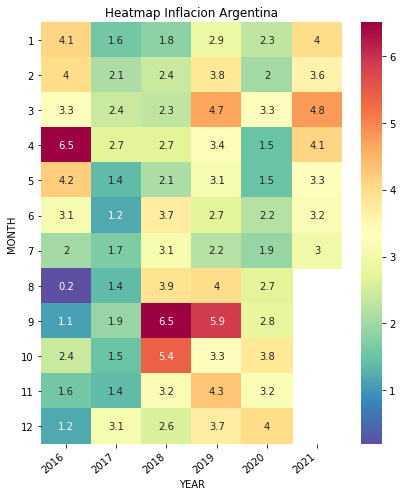

In [16]:
# HEATMAP
 
# Medidas
plt.figure(figsize=(6,7))
 
# Titulo
plt.title('Heatmap Inflacion Argentina')
 
# Grafico
ax = sns.heatmap(pivot_table, annot=True, cmap='Spectral_r') # Econtrar un mejor color...
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right",)
plt.tight_layout()
plt.show()

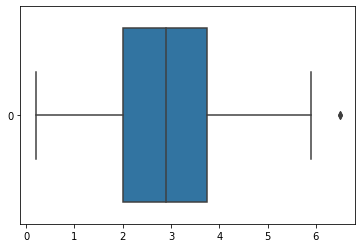

In [17]:
# Box plot
ax = sns.boxplot(data=ipc_arg['INFLATION_RATE'], orient="h")

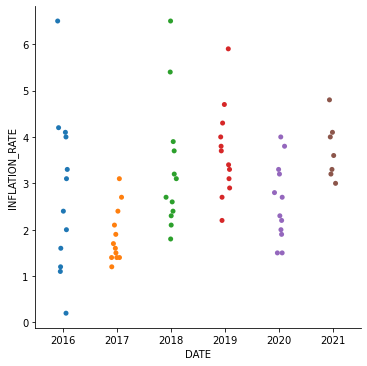

In [18]:
sns.catplot(x=pd.DatetimeIndex(ipc_arg.index).year, y='INFLATION_RATE', data=ipc_arg)
#pd.DatetimeIndex(Historical_data.index).year

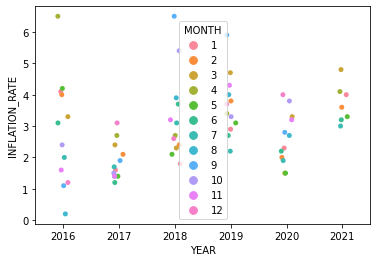

In [19]:
ax = sns.stripplot(x="YEAR", y='INFLATION_RATE', hue="MONTH", data=ipc_arg)

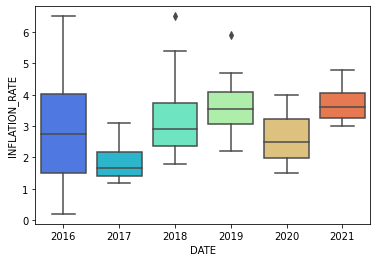

In [20]:
sns.boxplot(x=pd.DatetimeIndex(ipc_arg.index).year,y='INFLATION_RATE',data=ipc_arg,palette='rainbow')

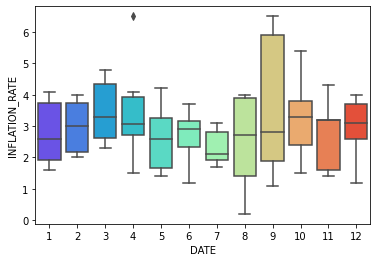

In [21]:
sns.boxplot(x=pd.DatetimeIndex(ipc_arg.index).month,y='INFLATION_RATE',data=ipc_arg,palette='rainbow')

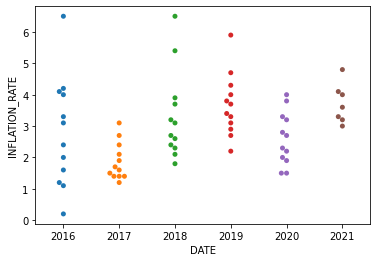

In [22]:
sns.swarmplot(x=pd.DatetimeIndex(ipc_arg.index).year, y="INFLATION_RATE", data=ipc_arg)

In [23]:
# VALOR MINIMO, MAXIMO Y PROMEDIO POR AÑO
info_anual = ipc_arg.resample('Y',convention='end')['INFLATION_RATE'].agg(['min','max','mean','median'])
info_anual

,min,max,mean,median
DATE,,,,
2016-12-31,0.2,6.5,2.808333,2.75
2017-12-31,1.2,3.1,1.866667,1.65
2018-12-31,1.8,6.5,3.308333,2.90
2019-12-31,2.2,5.9,3.666667,3.55
2020-12-31,1.5,4.0,2.600000,2.50
2021-12-31,3.0,4.8,3.714286,3.60
